# Libraries

In [1]:
from Bank_Campaign_Conversion.utils.paths import data_raw_dir
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import duckdb

# Main

### Problem statement

The primary problem is the difficulty in predicting which customers are more likely to accept an investment offer. Banks often do not have a model that can identify which customer characteristics or attributes are most indicative of a high probability of conversion. As a result, resources are allocated indiscriminately, affecting the effectiveness of the campaigns and leading to a less personalized experience for the customer.

### Input Variables

### 1. Bank Client Data:
- **age**: Age of the client (numeric)
- **job**: Type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")
- **marital**: Marital status (categorical: "married", "divorced", "single"; note: "divorced" means divorced or widowed)
- **education**: Education level (categorical: "unknown", "secondary", "primary", "tertiary")
- **default**: Has credit in default? (binary: "yes", "no")
- **balance**: Average yearly balance (numeric, euros)
- **housing**: Has a housing loan? (binary: "yes", "no")
- **loan**: Has a personal loan? (binary: "yes", "no")

### 2. Related with the Last Contact of the Current Campaign:
- **contact**: Communication type used during the last contact (categorical: "unknown", "telephone", "cellular")
- **day**: Last contact day of the month (numeric)
- **month**: Last contact month of the year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- **duration**: Duration of the last contact (numeric, in seconds)

### 3. Other Attributes:
- **campaign**: Number of contacts performed during the current campaign and for this client (numeric, includes the last contact)
- **pdays**: Number of days since the client was last contacted (numeric, -1 means the client was not previously contacted)
- **previous**: Number of contacts performed before this campaign and for this client (numeric)
- **poutcome**: Outcome of the previous marketing campaign (categorical: "unknown", "other", "failure", "success")


* dataset :https://archive.ics.uci.edu/dataset/222/bank+marketing

### Data Preparation

In [2]:
df=pd.read_csv(data_raw_dir("bank-full.csv"),sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [5]:
df.y = (df.y == 'yes').astype(int)

### Setting up the validation framework

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

### EDA

In [8]:
df_full_train.shape[0]

36168

In [9]:
df_full_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 22468 to 33003
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   default    36168 non-null  object
 5   balance    36168 non-null  int64 
 6   housing    36168 non-null  object
 7   loan       36168 non-null  object
 8   contact    36168 non-null  object
 9   day        36168 non-null  int64 
 10  month      36168 non-null  object
 11  duration   36168 non-null  int64 
 12  campaign   36168 non-null  int64 
 13  pdays      36168 non-null  int64 
 14  previous   36168 non-null  int64 
 15  poutcome   36168 non-null  object
 16  y          36168 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.0+ MB


In [10]:
df_full_train.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
for column in df_full_train.select_dtypes(exclude='number').columns:
    print('-'*30)
    print(f'*** {column} ***')
    print(df[column].value_counts())
    print('-'*30)
    input('Presione enter para continuar...')
    print('')
        

------------------------------
*** job ***
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
------------------------------


Presione enter para continuar... 



------------------------------
*** marital ***
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
------------------------------


Presione enter para continuar... 



------------------------------
*** education ***
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
------------------------------


Presione enter para continuar... 



------------------------------
*** default ***
default
no     44396
yes      815
Name: count, dtype: int64
------------------------------


Presione enter para continuar... 



------------------------------
*** housing ***
housing
yes    25130
no     20081
Name: count, dtype: int64
------------------------------


Presione enter para continuar... 



------------------------------
*** loan ***
loan
no     37967
yes     7244
Name: count, dtype: int64
------------------------------


Presione enter para continuar... 



------------------------------
*** contact ***
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64
------------------------------


Presione enter para continuar... 



------------------------------
*** month ***
month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64
------------------------------


Presione enter para continuar... 



------------------------------
*** poutcome ***
poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64
------------------------------


Presione enter para continuar... 


In [12]:
df_full_train.y.value_counts()

y
0    31929
1     4239
Name: count, dtype: int64

In [13]:
df_full_train.y.value_counts(normalize=True)

y
0    0.882797
1    0.117203
Name: proportion, dtype: float64

the subscription rate of our dataset is 0.11 %

we identify that our dataset  is inbalanced 

In [14]:
df_full_train.query("y==1").age.describe()

count    4239.000000
mean       41.659354
std        13.532424
min        18.000000
25%        31.000000
50%        38.000000
75%        50.000000
max        95.000000
Name: age, dtype: float64

In [15]:
df_full_train.query("y==1").job.value_counts(normalize=True)

job
management       0.246992
technician       0.155225
blue-collar      0.135173
admin.           0.120547
retired          0.098608
services         0.071243
student          0.051663
unemployed       0.036801
self-employed    0.033027
entrepreneur     0.023355
housemaid        0.020996
unknown          0.006369
Name: proportion, dtype: float64

In [16]:
df_full_train.query("y==1").education.value_counts(normalize=True)

education
secondary    0.462845
tertiary     0.375796
primary      0.113470
unknown      0.047889
Name: proportion, dtype: float64

In [17]:
df_full_train.query("y==1").balance.describe()

count     4239.000000
mean      1836.091767
std       3700.077267
min      -3058.000000
25%        215.000000
50%        747.000000
75%       2161.000000
max      81204.000000
Name: balance, dtype: float64

In [18]:
df_full_train.query("y==1").marital.value_counts(normalize=True)

marital
married     0.521821
single      0.360934
divorced    0.117245
Name: proportion, dtype: float64

In [19]:
df_full_train.query("y==1").housing.value_counts(normalize=True)

housing
no     0.631989
yes    0.368011
Name: proportion, dtype: float64

In [20]:
df_full_train.query("y==1").loan.value_counts(normalize=True)

loan
no     0.909413
yes    0.090587
Name: proportion, dtype: float64

Based on a preliminary analysis of the dataset, we can observe a general profile of the individuals who tend to accept a credit offer during the campaign.

People aged 38 and above show a higher acceptance rate. There is not a very clear dominance in terms of profession, however, the job category with the highest acceptance percentage (around 25%) corresponds to management positions.

Regarding education, almost half of the individuals who accepted the credit had a secondary education level. Also, the yearly average balance of these customers was around $747 or higher.

Additionally, around half of the people who accepted the offer were married, and approximately 90% of them already had a personal loan.

### Feature importance: Mutual information

**Mutual Information (MI)**: it is a number that tells you how much knowing one thing helps you guess another thing better.
If knowing A lets you predict B more accurately, MI is high; if knowing A does not help at all, MI is zero.

Simple example: seeing umbrellas usually helps you know if it is raining ⇒ high MI.
Seeing a cap probably tells you nothing ⇒ low/zero MI.

Here is a **non-technical** way to read the number returned by `mutual_info_score(X, Y)`:

* The function returns a **number ≥ 0**.
* **≈ 0.00** → *No useful relationship*: knowing one variable **does not help** to guess the other.
* **Slightly above 0** (e.g., 0.05–0.2) → *Very weak relationship*: it barely helps.
* **Intermediate** (e.g., 0.2–0.7) → *Noticeable relationship*: it does help to predict something.
* **High** (e.g., > 0.7, 1.0, 2.0, …) → *Strong relationship*: knowing one variable **helps a lot** to guess the other.
  *(Note: the value can exceed 1; it is not capped at 1).*

Important notes for proper interpretation:

* The scale **depends on the data** (how they are discretized and how many categories there are).
  That’s why it’s better to **compare MI across several variables** and keep the ones that have relatively higher MI, instead of using a “universal threshold.”
* It is always **symmetric**: `MI(X,Y) = MI(Y,X)`.


In [21]:
from sklearn.metrics import mutual_info_score


In [22]:
categorical_columns = list(df_full_train.select_dtypes(exclude='number').columns) + ['month']

In [23]:
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'month']

In [24]:

def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.y)

In [25]:
mi = df_full_train[categorical_columns].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

poutcome     0.028893
month        0.024718
month        0.024718
contact      0.013041
housing      0.009551
job          0.008437
loan         0.002641
education    0.002564
marital      0.001980
default      0.000407
dtype: float64

These mutual information results show that, individually, the categorical variables provide very little useful information for predicting whether a person will accept the bank product. Although “poutcome” and “month” are the most informative within this group, their MI values are still very low, meaning that knowing these variables only slightly improves prediction power. Variables such as education, marital status, having loans, or even having a default record contribute almost no information. In summary: none of the categorical variables by themselves are strong predictors, so better predictive signal will likely come from numerical variables or from combining multiple features together rather than depending on these categorical fields individually.

### Feature importance: Correlation

In [26]:
numerial_coluimns=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [27]:
df_full_train[numerial_coluimns].corrwith(df_full_train.y).abs().sort_values(ascending=False)

duration    0.398321
pdays       0.101045
previous    0.087392
campaign    0.072134
balance     0.055252
day         0.030624
age         0.024931
dtype: float64

These correlation values show which numerical variables have the strongest linear relationship with the target (accepting the credit offer). The variable **duration** stands out clearly as the most important, with a correlation of ~0.39, much higher than the others. This means that the **longer the call duration, the more likely the client is to accept the offer**. This is consistent with domain logic: people who stay longer on the call are usually more interested.

The rest of the variables have much smaller correlations. `pdays`, `previous`, `campaign`, and `balance` have weak positive relationships, indicating that they might add some information but not strong predictive power individually. Variables like `day` and `age` have very low correlation values, meaning they are **almost not useful on their own**.


In [28]:
from sklearn.feature_selection import mutual_info_classif

mi_num = mutual_info_classif(df_full_train[numerial_coluimns], df_full_train.y)
pd.Series(mi_num, index=numerial_coluimns).sort_values(ascending=False)


duration    0.074282
pdays       0.024857
balance     0.022405
previous    0.014343
age         0.012300
day         0.006604
campaign    0.003723
dtype: float64

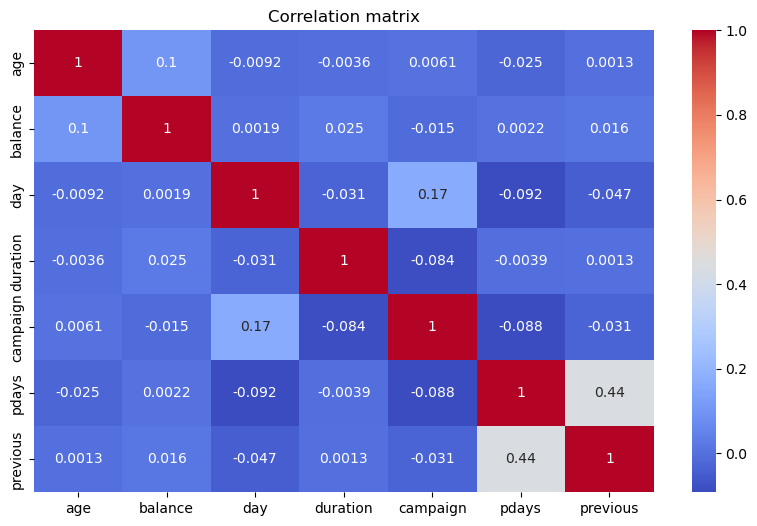

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_full_train[numerial_coluimns].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()


we can  observe there is no multicolineality between the numerical variables

## Pre procesing data

In [158]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

In [131]:
X_train = df_full_train.drop(columns='y')  # Variables independientes en el conjunto de entrenamiento
y_train = df_full_train['y']  # Variable dependiente en el conjunto de entrenamiento
X_test = df_test.drop(columns='y')  # Variables independientes en el conjunto de prueba
y_test = df_test['y']  # Variable dependiente en el conjunto de prueba


In [132]:
print('training dataset x : ', X_train.shape[0],'training dataset y : ', y_train.shape[0])
print('test dataset x : ', X_test.shape[0],'test dataset y : ', y_test.shape[0])


training dataset x :  36168 training dataset y :  36168
test dataset x :  9043 test dataset y :  9043


In [133]:
# Initialize the OneHotEncoder and LabelEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)  # For One-Hot Encoding of categorical variables
label_encoder = LabelEncoder()  # For Label Encoding of binary variables

In [134]:
# Variables to be transformed using OneHotEncoding
one_hot_columns = ['job', 'marital', 'education', 'contact', 'poutcome', 'month']

# Apply OneHotEncoder to the categorical nominal columns
df_one_hot = pd.DataFrame(one_hot_encoder.fit_transform(X_train[one_hot_columns]), columns=one_hot_encoder.get_feature_names_out(one_hot_columns))


In [135]:
print(f"Original X_train shape: {X_train.shape}")
print(f"New X_train shape after One-Hot Encoding: {df_one_hot.shape}")


Original X_train shape: (36168, 16)
New X_train shape after One-Hot Encoding: (36168, 38)


In [136]:
# Variables to be transformed using LabelEncoding
label_columns = ['default', 'housing', 'loan']

# Apply LabelEncoder to the binary variables
for col in label_columns:
    X_train[col + '_encoded'] = label_encoder.fit_transform(X_train[col])

In [137]:
print(f"Original X_train shape: {X_train.shape}")
print(f"New X_train shape after One-Hot Encoding: {df_one_hot.shape}")

Original X_train shape: (36168, 19)
New X_train shape after One-Hot Encoding: (36168, 38)


In [138]:
# Asegúrate de que los índices de ambos DataFrames coinciden
print(f"X_train index before concatenation: {X_train.index}")
print(f"df_one_hot index before concatenation: {df_one_hot.index}")

# Si los índices no coinciden, restablecer los índices
X_train = X_train.reset_index(drop=True)
df_one_hot = df_one_hot.reset_index(drop=True)

# Ahora, realiza la concatenación
X_train = pd.concat([X_train, df_one_hot], axis=1)

# Verificar las dimensiones finales después de concatenar
print(f"Final X_train shape: {X_train.shape[0]}")


# Drop the original columns that have been encoded (to avoid duplication)
X_train = X_train.drop(columns=one_hot_columns + label_columns)

X_train index before concatenation: Index([22468,  6896, 28408,  8481, 28753, 14660, 33214, 11269, 22761,  5989,
       ...
        7751, 20609, 32912, 21440,  7813, 43723, 32511,  5192, 12172, 33003],
      dtype='int64', length=36168)
df_one_hot index before concatenation: RangeIndex(start=0, stop=36168, step=1)
Final X_train shape: 36168


In [139]:
X_train.head()

,age,balance,day,duration,campaign,pdays,previous,default_encoded,housing_encoded,loan_encoded,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,52,0,22,232,2,-1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50,330,28,24,1,-1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,45,300,29,203,1,261,3,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38,27,3,404,4,-1,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,31,887,30,427,1,-1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para equilibrar el dataset de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Original dataset shape: {y_train.value_counts()}")
print(f"Resampled dataset shape: {y_train_resampled.value_counts()}")


Original dataset shape: y
0    31929
1     4239
Name: count, dtype: int64
Resampled dataset shape: y
0    31929
1    31929
Name: count, dtype: int64


In [159]:
scaler = StandardScaler()
X_train_resampled[['age', 'balance', 'day', 'duration', 'campaign']] = scaler.fit_transform(X_train_resampled[['age', 'balance', 'day', 'duration', 'campaign']])

## Logisitic regression

In [141]:
from sklearn.linear_model import LogisticRegression

In [162]:
model = LogisticRegression(random_state=42)
result = model.fit(X_train_resampled, y_train_resampled)

C:\Users\ASUS TUF\.conda\envs\bank_campaign_conversion\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [143]:
X_test = X_test.reset_index(drop=True)
df_one_hot_test = pd.DataFrame(one_hot_encoder.transform(X_test[one_hot_columns]), 
                               columns=one_hot_encoder.get_feature_names_out(one_hot_columns))
for col in label_columns:
    X_test[col + '_encoded'] = label_encoder.transform(X_test[col])
X_test = pd.concat([X_test, df_one_hot_test], axis=1)

In [160]:
X_test[['age', 'balance', 'day', 'duration', 'campaign']] = scaler.transform(X_test[['age', 'balance', 'day', 'duration', 'campaign']])

In [144]:
X_test = X_test.drop(columns=one_hot_columns + label_columns)
print(f"Transformed X_test shape: {X_test.shape[0]}")

Transformed X_test shape: 9043


### Evaluation

In [163]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


**ACCURACCY**

In [164]:
y_predict=model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test ))

0.8894172287957536


In [165]:
y_pred = model.predict_proba(X_test)[:, 1]

0.00 0.116
0.05 0.444
0.10 0.560
0.15 0.632
0.20 0.692
0.25 0.736
0.30 0.768
0.35 0.794
0.40 0.812
0.45 0.827
0.50 0.842
0.55 0.857
0.60 0.865
0.65 0.875
0.70 0.885
0.75 0.892
0.80 0.896
0.85 0.896
0.90 0.899
0.95 0.896
1.00 0.884


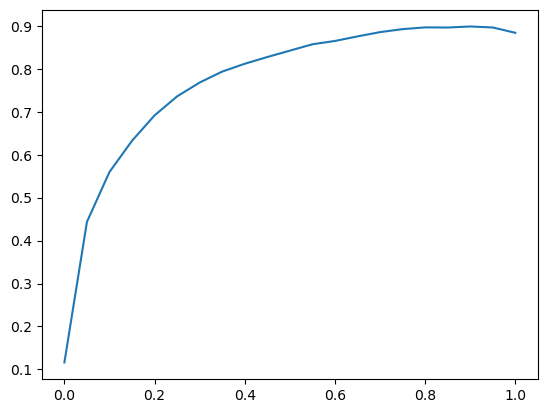

In [166]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_test, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)
plt.plot(thresholds, scores)

In [167]:
# Si quieres también calcular la exactitud (accuracy)
accuracy = accuracy_score(y_test,y_pred>0.90)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8986


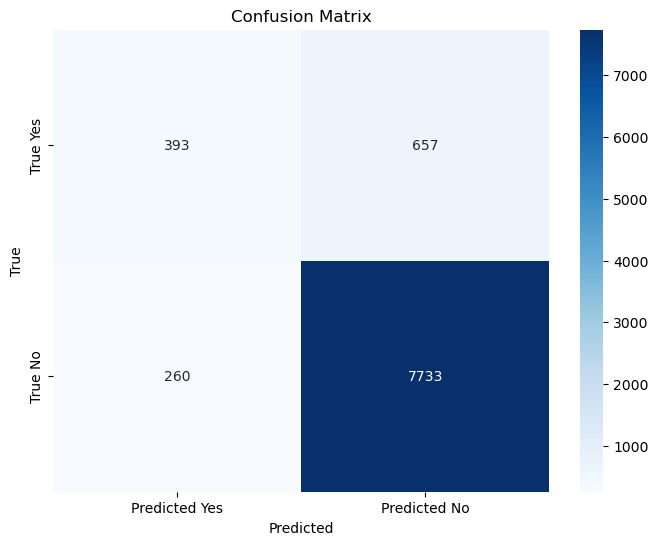

In [168]:
y_pred_class = (y_pred > 0.90).astype(int)  # Asume que 1 es la clase positiva y 0 es la clase negativa

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_class, labels=[1, 0])  # Definir explícitamente el orden de las clases

# Mostrar la matriz de confusión como un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Yes', 'Predicted No'], yticklabels=['True Yes', 'True No'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [169]:

# Calcular precision, recall y F1 score
precision = precision_score(y_test, y_pred>0.90)
recall = recall_score(y_test, y_pred>0.90)
f1 = f1_score(y_test, y_pred>0.90)

# Mostrar las métricas
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.6018
Recall: 0.3743
F1 Score: 0.4615
